<a href="https://colab.research.google.com/github/csgellert/tobbvalt-projekt/blob/Open-in-colab/snake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Többváltozós analízis mérnöki alkalmazásai projekt

## Snake

### Hogy állunk jelenleg?

- A játék egy objektumon keresztül folyik
- A megjelenítés még nem az igazi
- A pálya zárt, négyzet alakú. (Nem lehet átmenni a falon mint egy topológialag tórusznak tekinthető pályán)

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import random
import time

In [0]:
class kigyo:
    palyaSize = 50 #hányszor hányas legyen a pálya
    palya = np.ones((palyaSize,palyaSize))
    fej = (25,25)#legyen monajuk a pálya közepén (parametrikusan elegánsabb)
    snake = []#ebbe a tömbbe pakoljuk a kígyó testét
    snake.append(fej)#rakjuk is bele a fejét
    snake.append((fej[0]-1,fej[1]))
    snake.append((fej[0]-2,fej[1]))
    kaja = (20,25)#hol van a kaja
    isAlive = True #él e még az adott példány
    steps = 0 #hány lépést élt meg az adott példány... (ez az AIhoz jöhet jól)
    score = 0 # hány kaját evett meg eddig
    fitness = 0
    #Egy konstruktor biztosan nem árt meg...
    def __init__(self,nev):
        self.name = nev #ez még nem fontos ,de később még jól jöhet 
    def ujKaja(self):#Arra majd még figyelni kell hogy az új kaja ne legyen a kígyóban...
        x = random.randint(0,self.palyaSize)#Véletlenszerűen új helyet keresünk neki
        y = random.randint(0,self.palyaSize)
        self.score +=1
        return (x,y)
    #hogy mozogni is tudjon...
    def move(self,direction):
        if(direction == 0):#felfele megy
            self.fej = (self.fej[0]-1,self.fej[1])
            self.utkozike() #Meghaltunk-e?
            #kajál -e?
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)#Ez esetben csak nő
                self.kaja= self.ujKaja()#Új kaját kell generálni
            else:
                self.snake.pop()#A végét levágjuk
                self.snake.insert(0,self.fej)#megy tovább a fej irányába
        #jobbra megy
        if(direction == 1):
            self.fej = (self.fej[0],self.fej[1]+1)
            self.utkozike()
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)
        #lefelé megy
        if(direction == 2):
            self.fej = (self.fej[0]+1,self.fej[1])
            self.utkozike()
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)
        #balra megy
        if(direction == 3):
            self.fej = (self.fej[0],self.fej[1]-1)
            self.utkozike()
            #kajál -e?
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)        
        self.steps +=1
        self.fitness = self.steps + self.score *100
    #Hogy ki is rajzolhassuk
    def mutat(self):
        self.palya= np.zeros((self.palyaSize,self.palyaSize))#Tisztítsuk meg a palyat
        for i in self.snake:
            self.palya[i]=1 #ahol a kigyo van ott legyen 1
        self.palya[self.kaja]=0.5 #ahol a kaja van ott pedig 0
        plt.imshow(self.palya, cmap='gray')
        #Ha a következő sort kikommentelitek akkor pedig mindig új ábrát hoz létre...
        #plt.show()
    def utkozike(self):
        if(self.fej[0]==-1 or self.fej[0]==self.palyaSize or self.fej[1]==-1 or self.fej[1]==self.palyaSize):
            #print("meghaltal")#Ha kimegy a pályáról
            self.isAlive = False
        elif(self.fej in self.snake[:-1]):
            #print("meghaltal")#Ha önmagába ütközik
            self.isAlive = False
    

In [0]:
class evol:
    gen = 1 # hanyadik generációnál járunk...
    def __init__(self):
        peldanySzam = 100 #hány példány van egy generációban
        self.peldanyok = [] #A kezdeti állományok...
        for i in range(peldanySzam):
            self.peldanyok.append(kigyo("gen1." + str(i))) #töltsük fel az állományt
    def play(self): #Mindegyik példány lejátszik egy meccset
        for i in self.peldanyok:
            for k in range(100): # Ne bolyonghasssanak a végtelenségig...
                irany = random.randint(0,3)# egyenlőre véletlenszerűen mozognak
                if(i.isAlive):
                    i.move(irany)
                else:
                    break # Ha meghal ne csinálja tovább...
            else:
                i.fitness = i.steps + i.score *100 #Ez a sor szerintem nem münködik
    def legjobb(self): #Ezt csak kiírarásra használtam
        maximum = 0
        maxidx = 0
        for idx,i in enumerate(self.peldanyok):
            if i.fitness > maximum:
                maximum = i.fitness
                maxidx = idx
        print(maximum , maxidx)
            

[(26, 25), (25, 25), (24, 25)]
[(26, 26), (26, 25), (25, 25)]
[(26, 27), (26, 26), (26, 25)]
[(26, 28), (26, 27), (26, 26)]
[(26, 27), (26, 28), (26, 27)]


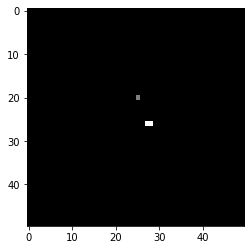

In [0]:
#itt lehet próbálgatni a funkciókat...
pl = kigyo("elso")
#pl.mutat()
#print(pl.snake)
for i in range(100): # véletlen lépegetés
    irany = random.randint(0,3)
    if(pl.isAlive):
        pl.move(irany)  
        print(pl.snake)# Ez csak azért van itt hogy lássuk merre megy. Amúgy majd kikommentelendő
pl.mutat()
del pl

In [0]:
ev = evol() #Hozzuk létre az objektumot
ev.play() # Játszassuk le
ev.legjobb() # írassuk ki a legjobbat

14 27


In [0]:
print(ev.peldanyok[14].snake)

[(26, 26), (25, 26), (26, 26)]
